
#📌 1. Extracción

##Importamos libreria
* cargamos el ds

In [283]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json
from scipy import stats

# URL RAW del archivo JSON en GitHub
url = 'https://raw.githubusercontent.com/Oracle-AluraLatam-ONE/Telecom-X-Analisis-Churn-de-clientes/main/file/TelecomX_Data.json'

# Descargar datos
response = requests.get(url)

# Verificar que la descarga fue exitosa
if response.status_code == 200:
    data = json.loads(response.text)

    # Vista previa básica
    print(type(data))        # debe ser una lista
    print('*******************')
    print(type(data[0]))     # debe ser un diccionario
    print('*******************')
    print(json.dumps(data[0], indent=2))  # ver primer registro
    print('*******************')



<class 'list'>
*******************
<class 'dict'>
*******************
{
  "customerID": "0002-ORFBO",
  "Churn": "No",
  "customer": {
    "gender": "Female",
    "SeniorCitizen": 0,
    "Partner": "Yes",
    "Dependents": "Yes",
    "tenure": 9
  },
  "phone": {
    "PhoneService": "Yes",
    "MultipleLines": "No"
  },
  "internet": {
    "InternetService": "DSL",
    "OnlineSecurity": "No",
    "OnlineBackup": "Yes",
    "DeviceProtection": "No",
    "TechSupport": "Yes",
    "StreamingTV": "Yes",
    "StreamingMovies": "No"
  },
  "account": {
    "Contract": "One year",
    "PaperlessBilling": "Yes",
    "PaymentMethod": "Mailed check",
    "Charges": {
      "Monthly": 65.6,
      "Total": "593.3"
    }
  }
}
*******************


## Se convierten los datos anidados en un DataFrame plano.
* Se verifica que los  datos están organizados en jerarquías por lo que se usa json_normalize para aplanar su estructura anidada

In [284]:
df= pd.json_normalize(data)
df.head()


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


Luego de aplanar la estructura anidada , verifico filas y columnas nuevamente


In [285]:
print ('**************')
print('Filas y columnas :\n ', df.shape)

**************
Filas y columnas :
  (7267, 21)


## Exploramos la estructura del dataset

In [286]:
# Ver información general del DataFrame
# Ver tipos de datos
print(df.dtypes)
print ('\n**************')


customerID                    object
Churn                         object
customer.gender               object
customer.SeniorCitizen         int64
customer.Partner              object
customer.Dependents           object
customer.tenure                int64
phone.PhoneService            object
phone.MultipleLines           object
internet.InternetService      object
internet.OnlineSecurity       object
internet.OnlineBackup         object
internet.DeviceProtection     object
internet.TechSupport          object
internet.StreamingTV          object
internet.StreamingMovies      object
account.Contract              object
account.PaperlessBilling      object
account.PaymentMethod         object
account.Charges.Monthly      float64
account.Charges.Total         object
dtype: object

**************


##  Verifico si hay valores nulos

In [287]:

print(df.isnull().sum().sum())


0


## Columnas
* Consulto las columnas para revisar las columnas más relevantes para el análisis  de evasion de clientes. (Churn)

In [288]:
print('Columnas')
for col in df.columns:
  print ('-', col)

Columnas
- customerID
- Churn
- customer.gender
- customer.SeniorCitizen
- customer.Partner
- customer.Dependents
- customer.tenure
- phone.PhoneService
- phone.MultipleLines
- internet.InternetService
- internet.OnlineSecurity
- internet.OnlineBackup
- internet.DeviceProtection
- internet.TechSupport
- internet.StreamingTV
- internet.StreamingMovies
- account.Contract
- account.PaperlessBilling
- account.PaymentMethod
- account.Charges.Monthly
- account.Charges.Total


In [289]:
# Eliminar espacios por si acaso
df.columns = df.columns.str.strip()

# Mostrar los valores únicos en la columna Churn
print(f"Valores únicos en la columna Churn:\n")
print(df['Churn'].unique())
print('\n*****************************')

# Mostrar el conteo, incluyendo posibles vacíos
churn_counts = df['Churn'].value_counts(dropna=False)
print('\nConteo de valores en Churn (incluye vacíos):')
print(churn_counts)

# Verificar si hay valores vacíos ('') específicamente
if (df['Churn'] == '').any():
    print('\n⚠️  Atención: Hay valores vacíos ("") en la columna Churn.')




Valores únicos en la columna Churn:

['No' 'Yes' '']

*****************************

Conteo de valores en Churn (incluye vacíos):
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64

⚠️  Atención: Hay valores vacíos ("") en la columna Churn.


##  Se verifican 224 datos de Churn vacios,  
* debo evaluar esto desde dos ángulos: tamaño de la pérdida de datos y sentido analítico.
* Los valores vacios no pueden analizarse
* Evalua cual es el porcentaje de churn vacios para saber si el menos de 5%




In [290]:
# Filtrar registros con valor vacío en 'Churn'
faltantes = df[df['Churn'] == '']
print("Registros con 'Churn' vacío:", len(faltantes))
# Verificar si hay registros con 'Churn' vacío

print ('*****************************')

print( f" \nChurn Nulos {df ['Churn'].isna().mean()*100:.2f}%")
print (f"\n Churn Vacíos  {(df ['Churn'] == '').mean()*100:.2f}%")


Registros con 'Churn' vacío: 224
*****************************
 
Churn Nulos 0.00%

 Churn Vacíos  3.08%


##   Se eliminan los churn vacios

In [291]:
# Eliminar filas donde Churn es una cadena vacía
df = df[df['Churn'] != '']

# Verificar que se eliminaron correctamente
print(f"Valores únicos en Churn después de limpiar: {df['Churn'].unique()}")
# Mostrar el conteo, incluyendo posibles vacíos
churn_counts = df['Churn'].value_counts(dropna=False)
print('\nConteo de valores en Churn sin filas vacías:')
print(churn_counts)

Valores únicos en Churn después de limpiar: ['No' 'Yes']

Conteo de valores en Churn sin filas vacías:
Churn
No     5174
Yes    1869
Name: count, dtype: int64


##  Verificar duplicados

In [292]:
duplicados = df.duplicated().sum()
print(f"\nFilas duplicadas en el dataset: {duplicados}")



Filas duplicadas en el dataset: 0


#🔧 2.Transformación

### Explorar columnas y tipos de datos

In [293]:
print("\nTipos de datos por columna:")
print(df.dtypes)
df.info()



Tipos de datos por columna:
customerID                    object
Churn                         object
customer.gender               object
customer.SeniorCitizen         int64
customer.Partner              object
customer.Dependents           object
customer.tenure                int64
phone.PhoneService            object
phone.MultipleLines           object
internet.InternetService      object
internet.OnlineSecurity       object
internet.OnlineBackup         object
internet.DeviceProtection     object
internet.TechSupport          object
internet.StreamingTV          object
internet.StreamingMovies      object
account.Contract              object
account.PaperlessBilling      object
account.PaymentMethod         object
account.Charges.Monthly      float64
account.Charges.Total         object
dtype: object
<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------           

## Renombrar columnas anidadas para mayor claridad.

In [294]:
print(df.columns.tolist())

['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'account.Charges.Monthly', 'account.Charges.Total']


### Renombrar columnas eliminando el prefijo (lo que está antes del '.')

In [295]:
## 2.1 Renombrado de columnas
# Eliminar prefijos como 'customer.', 'phone.', etc.
df.columns = df.columns.str.replace('customer.', '', regex=False)\
                       .str.replace('phone.', '', regex=False)\
                       .str.replace('internet.', '', regex=False)\
                       .str.replace('account.', '', regex=False)
print(f"Columnas renombradas:\n", df.columns.tolist())


Columnas renombradas:
 ['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total']


##  Crear diccionario de datos a partir del archivo Markdown


In [296]:
import requests

# URL RAW del diccionario en GitHub
url = 'https://raw.githubusercontent.com/Oracle-AluraLatam-ONE/Telecom-X-Analisis-Churn-de-clientes/main/file/TelecomX_diccionario.md'

# Descargar el archivo
response = requests.get(url)
texto_diccionario = response.text

# Convertir a diccionario Python limpiando Markdown
diccionario_columnas = {}

for linea in texto_diccionario.split('\n'):
    if ':' in linea:
        columna, descripcion = linea.split(':', 1)
        # Limpiar caracteres Markdown: guiones, backticks, espacios extra
        columna = columna.replace('-', '').replace('`', '').strip()
        diccionario_columnas[columna] = descripcion.strip()

# ✅ Ejemplo de búsqueda
print("Significado de 'SeniorCitizen':", diccionario_columnas.get('SeniorCitizen', 'Descripción no encontrada'))

# ✅ Ver claves disponibles
print("\nColumnas disponibles en el diccionario:")
print(list(diccionario_columnas.keys()))



Significado de 'SeniorCitizen': información sobre si un cliente tiene o no una edad igual o mayor a 65 años

Columnas disponibles en el diccionario:
['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total']


## Transformar datos: conversiones de tipo
Algunas columnas que parecen numéricas en realidad vienen como texto (por ejemplo, "Charges.Total"), lo cual puede causar errores en análisis y gráficos.


In [297]:
print (df[['tenure', 'Charges.Monthly',	'Charges.Total']].dtypes)


tenure               int64
Charges.Monthly    float64
Charges.Total       object
dtype: object


In [298]:


# Convertir TotalCharges a numérico
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')
print (df[['tenure', 'Charges.Monthly',	'Charges.Total']].dtypes)



tenure               int64
Charges.Monthly    float64
Charges.Total      float64
dtype: object


# Crear columna Cuentas_Diarias
 Usamos Charges.Monthly dividido entre 30 para obtener el promedio diario

 ###  Creación de Cuentas_Diarias
A partir de la facturación mensual (`Charges.Monthly`), se generó la columna `Cuentas_Diarias` calculando el valor diario promedio.  
Este indicador permite analizar patrones de gasto de forma más granular a lo largo del tiempo.


In [299]:

df['Cuentas_Diarias'] = df['Charges.Monthly'] / 30

# Confirmamos creación
print(df[['Charges.Monthly', 'Cuentas_Diarias']].head())

# Validamos que no existan valores nulos críticos
print("\nValores nulos en Cuentas_Diarias:", df['Cuentas_Diarias'].isna().sum())


   Charges.Monthly  Cuentas_Diarias
0             65.6         2.186667
1             59.9         1.996667
2             73.9         2.463333
3             98.0         3.266667
4             83.9         2.796667

Valores nulos en Cuentas_Diarias: 0


## Comenzar la codificación de categorías.

Antes de crear modelos o hacer comparaciones numéricas, es útil codificar columnas:
- Para variables binarias (Yes/No) usamos 1/0.
- Para variables multicategoría (Contract, InternetService, PaymentMethod) usamos *one-hot* (columnas dummy).
No es obligatorio para análisis descriptivo, pero facilita cálculo de proporciones y gráficas.


In [300]:
# 2.4 Preparar: revisar nombres de columnas actuales y tipos
print("Columnas actuales:")
print(df.columns.tolist())
print("\nTipos de datos (resumen):")
print(df.dtypes.value_counts())


Columnas actuales:
['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias']

Tipos de datos (resumen):
object     17
float64     3
int64       2
Name: count, dtype: int64


##Mapear binarias (Yes/No) -> 1/0


In [301]:

binarias = ['Partner','Dependents','PhoneService','PaperlessBilling','Churn']  # 'Churn' es objetivo
# Asegurarse que las columnas estén en el df antes de mapear
bin_exist = [c for c in binarias if c in df.columns]

for col in bin_exist:
    df[col] = df[col].replace({'Yes':1,'No':0,'yes':1,'no':0})
    # Si quedó algún valor extraño, intentamos forzar numeric
    df[col] = pd.to_numeric(df[col], errors='coerce').astype('Int64')

print("Columnas binarias mapeadas:", bin_exist)
display(df[bin_exist].head())


Columnas binarias mapeadas: ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']


/tmp/ipython-input-691162997.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({'Yes':1,'No':0,'yes':1,'no':0})


,Partner,Dependents,PhoneService,PaperlessBilling,Churn
0,1,1,1,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,1,0,1,1,1
4,1,0,1,1,1


###  One-hot encoding para columnas multicategoría
 Buscar columnas candidatas (contrato, internet, payment)

In [302]:

cands = [c for c in ['Contract','InternetService','PaymentMethod','gender'] if c in df.columns]
cands


['Contract', 'InternetService', 'PaymentMethod', 'gender']

### Churn vs Categóricas (reparar uso de columnas originales) hay que conservar las columnas originales antes de codificar para este análisis.

In [303]:
# Guardar copia de columnas categóricas originales para análisis posteriores
df_categoricas_original = df[['Contract', 'InternetService', 'PaymentMethod', 'gender', 'SeniorCitizen']].copy()


In [304]:
# Realizar get_dummies para estas columnas (si existen)
cols_onehot = [c for c in cands if c in df.columns]
print("One-hot para:", cols_onehot)
df = pd.get_dummies(df, columns=cols_onehot, prefix=cols_onehot, drop_first=False)
print("One-hot creadas. Columnas actuales (ejemplo principio):")
print(df.columns.tolist()[:40])


One-hot para: ['Contract', 'InternetService', 'PaymentMethod', 'gender']
One-hot creadas. Columnas actuales (ejemplo principio):
['customerID', 'Churn', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'gender_Female', 'gender_Male']


##  Consultar y comentar las columnas usando el diccionario
Vamos a crear una tabla resumen con: columna | tipo | significado (si está en el diccionario).


In [305]:

if 'diccionario_columnas' not in globals():
    url_dic = 'https://raw.githubusercontent.com/Oracle-AluraLatam-ONE/Telecom-X-Analisis-Churn-de-clientes/main/file/TelecomX_diccionario.md'
    try:
        txt = requests.get(url_dic, timeout=10).text
        diccionario_columnas = {}
        for linea in txt.splitlines():
            if ':' in linea:
                k, v = linea.split(':', 1)
                k = k.replace('-', '').replace('`', '').strip()
                diccionario_columnas[k] = v.strip()
    except Exception as e:
        diccionario_columnas = {}
        print("No se pudo cargar diccionario:", e)

# Normalizar claves a minúsculas para buscar coincidencias
dic_lower = {k.lower(): v for k,v in diccionario_columnas.items()}

# Construir resumen
resumen = []
for col in df.columns:
    key = col.lower()
    # intentar varios matches comunes
    desc = dic_lower.get(key)
    if desc is None:
        # intentar con puntos removidos
        desc = dic_lower.get(key.replace('_','').replace(' ',''))
    if desc is None and '.' in key:
        desc = dic_lower.get(key.split('.')[-1])
    resumen.append({'columna': col, 'dtype': str(df[col].dtype), 'descripcion': desc or 'Descripción no disponible'})

resumen_df = pd.DataFrame(resumen)
display(resumen_df)


,columna,dtype,descripcion
0,customerID,object,número de identificación único de cada cliente
1,Churn,Int64,si el cliente dejó o no la empresa
2,SeniorCitizen,int64,información sobre si un cliente tiene o no una...
3,Partner,Int64,si el cliente tiene o no una pareja
4,Dependents,Int64,si el cliente tiene o no dependientes
5,tenure,int64,meses de contrato del cliente
6,PhoneService,Int64,suscripción al servicio telefónico
7,MultipleLines,object,suscripción a más de una línea telefónica
8,OnlineSecurity,object,suscripción adicional de seguridad en línea
9,OnlineBackup,object,suscripción adicional de respaldo en línea


#> Revisa la tabla: para cada columna tenés el tipo y la descripción si está en el diccionario.  
> Si alguna descripción falta, podés copiarla manualmente desde `TelecomX_diccionario.md`.


##  Reemplazar valores no estándar
Algunos campos usan textos como `"No internet service"` o `"No phone service"`. Para análisis conviene estandarizarlos (ej. 'No').


In [306]:
# 2.6 Reemplazar textos especiales por 'No' en columnas que suelen tener esos valores
reemplazos = {'No internet service':'No', 'No phone service':'No', 'No internet': 'No'}
obj_cols = df.select_dtypes(include=['object']).columns.tolist()
for c in obj_cols:
    # aplicar solo si contiene esos valores
    if df[c].isin(reemplazos.keys()).any():
        df[c] = df[c].replace(reemplazos)
        print("Reemplazado en:", c)

# Confirmación rápida (ver si quedó algo con 'No internet')
for c in obj_cols:
    if df[c].astype(str).str.contains('No internet', na=False).any():
        print("Atención, sigue 'No internet' en:", c)


Reemplazado en: MultipleLines
Reemplazado en: OnlineSecurity
Reemplazado en: OnlineBackup
Reemplazado en: DeviceProtection
Reemplazado en: TechSupport
Reemplazado en: StreamingTV
Reemplazado en: StreamingMovies


##  Detectar outliers en `Charges.Monthly` (MonthlyCharges) y `tenure`
Usaremos IQR para ver valores extremos y, si corresponde, reportarlos. No eliminamos automáticamente — solo detectamos.


In [307]:
# 2.7 Identificar nombres de columnas numéricas relevantes
num_candidates = []
for name in df.columns:
    ln = name.lower()
    if 'monthly' in ln or 'charges.monthly' in ln or 'charges_monthly' in ln or 'monthlycharges' in ln:
        num_candidates.append(name)
    if 'total' in ln and 'charge' in ln:
        num_candidates.append(name)
    if 'tenure' == ln:
        num_candidates.append(name)
# Dejamos únicos
num_candidates = list(dict.fromkeys(num_candidates))
print("Candidatas numéricas identificadas:", num_candidates)

# Seleccionar Tenure, Monthly y Total si existen
ten_col = 'tenure' if 'tenure' in df.columns else None
monthly_col = None
total_col = None
for c in df.columns:
    if 'monthly' in c.lower() and monthly_col is None:
        monthly_col = c
    if 'total' in c.lower() and total_col is None:
        total_col = c

print("tenure:", ten_col, "monthly:", monthly_col, "total:", total_col)

# Función IQR outliers
def iqr_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    low = q1 - 1.5*iqr
    high = q3 + 1.5*iqr
    out = series[(series < low) | (series > high)]
    return {'count': out.count(), 'low': low, 'high': high, 'outliers_sample': out.head().tolist()}

for col in [ten_col, monthly_col, total_col]:
    if col and col in df.columns and pd.api.types.is_numeric_dtype(df[col]):
        res = iqr_outliers(df[col].dropna())
        print(f"\nOutliers en {col}: {res['count']} (low_threshold={res['low']:.2f}, high_threshold={res['high']:.2f})")
        print("Ejemplo outliers (muestra):", res['outliers_sample'])


Candidatas numéricas identificadas: ['tenure', 'Charges.Monthly', 'Charges.Total']
tenure: tenure monthly: Charges.Monthly total: Charges.Total

Outliers en tenure: 0 (low_threshold=-60.00, high_threshold=124.00)
Ejemplo outliers (muestra): []

Outliers en Charges.Monthly: 0 (low_threshold=-46.02, high_threshold=171.38)
Ejemplo outliers (muestra): []

Outliers en Charges.Total: 0 (low_threshold=-4688.48, high_threshold=8884.67)
Ejemplo outliers (muestra): []


> Si hay outliers en `Monthly` o `Total`, no es obligatorio eliminarlos: revisá si son valores válidos (clientes con muchos meses y cargos altos). Si son errores (por ej. 99999), conviene corregirlos o eliminarlos. Documentalo en el informe.


#📊 3.Carga y análisis de dataset limpio (opcional pero recomendado)
Guardamos una copia CSV del dataset ya transformado.


##   Dejar una copia del dataset limpio (por ejemplo, guardar en .csv).

In [308]:
# Guardar CSV
df.to_csv('TelecomX_limpio_transformado.csv', index=False)
print("Guardado: TelecomX_limpio_transformado.csv")


Guardado: TelecomX_limpio_transformado.csv


##  Confirmar que el dataset transformado está listo (sin nulos críticos)
Comprobamos nulos y tipos finales.


## Confirmar que el dataset transformado está listo (sin nulos críticos)
Comprobamos nulos y tipos finales.


In [309]:
# 3.2 Revisión final: nulos por columna y tipos
display(pd.DataFrame({'dtype': df.dtypes, 'nulos': df.isna().sum(), 'nulos_pct': (df.isna().mean()*100).round(2)}))


,dtype,nulos,nulos_pct
customerID,object,0,0.00
Churn,Int64,0,0.00
SeniorCitizen,int64,0,0.00
Partner,Int64,0,0.00
Dependents,Int64,0,0.00
tenure,int64,0,0.00
PhoneService,Int64,0,0.00
MultipleLines,object,0,0.00
OnlineSecurity,object,0,0.00
OnlineBackup,object,0,0.00


## Análisis descriptivo general

Se calculan medidas estadísticas para todas las variables del dataset:
- **Numéricas**: promedio, mediana, desviación estándar, valores mínimo y máximo.
- **Categóricas**: cantidad de categorías únicas y valores más frecuentes.

**Principales observaciones:**
- `tenure` promedio de ~32 meses, mínimo de 0 y máximo de 72.
- `Charges.Monthly` promedio de ~64 USD, con un rango amplio que refleja diferentes combinaciones de servicios.
- `Charges.Total` varía desde valores muy bajos (clientes nuevos) hasta más de 8.000 USD (clientes de larga permanencia).
- `Cuentas_Diarias` promedio de ~2,1 USD/día.


In [310]:
# Análisis descriptivo general
desc_stats = df.describe(include='all').transpose()

# Mostramos las estadísticas
display(desc_stats)

# Comentarios automáticos básicos
print("Cantidad de registros:", df.shape[0])
print("Cantidad de columnas:", df.shape[1])
print("\nVariables numéricas analizadas: tenure, Charges.Monthly, Charges.Total, Cuentas_Diarias")


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,9995-HOTOH,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Churn,7043.0,<NA>,<NA>,<NA>,0.26537,0.441561,0.0,0.0,0.0,1.0,1.0
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043.0,<NA>,<NA>,<NA>,0.483033,0.499748,0.0,0.0,0.0,1.0,1.0
Dependents,7043.0,<NA>,<NA>,<NA>,0.299588,0.45811,0.0,0.0,0.0,1.0,1.0
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043.0,<NA>,<NA>,<NA>,0.903166,0.295752,0.0,1.0,1.0,1.0,1.0
MultipleLines,7043,2,No,4072,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,2,No,5024,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineBackup,7043,2,No,4614,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Cantidad de registros: 7043
Cantidad de columnas: 30

Variables numéricas analizadas: tenure, Charges.Monthly, Charges.Total, Cuentas_Diarias


## (Opcional) Separación train/test — solo si vas a modelar después
Mostramos cómo hacerlo en caso de que lo necesites (no obligatorio para la TAREA).


In [311]:
from sklearn.model_selection import train_test_split

if 'Churn' in df.columns:
    # Si Churn está codificado 1/0 conviene usarlo; si no, mapear primero
    if df['Churn'].dtype.name in ['object','category']:
        # mapear temporalmente para separar
        df['Churn_tmp'] = df['Churn'].replace({'Yes':1,'No':0})
    else:
        df['Churn_tmp'] = df['Churn']
    X = df.drop(columns=['Churn','Churn_tmp']) if 'Churn' in df.columns else df.copy()
    y = df['Churn_tmp']
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
    print("Split realizado. Train:", X_train.shape, "Test:", X_test.shape)
    # eliminar columna temporal si no la querés mantener
    df.drop(columns=['Churn_tmp'], inplace=True, errors=False)
else:
    print("No hay columna Churn para split.")


Split realizado. Train: (5634, 29) Test: (1409, 29)


## Distribución de Churn (conteo y porcentaje)


,count,percent
Churn_label,,
No,5174,73.46
Yes,1869,26.54


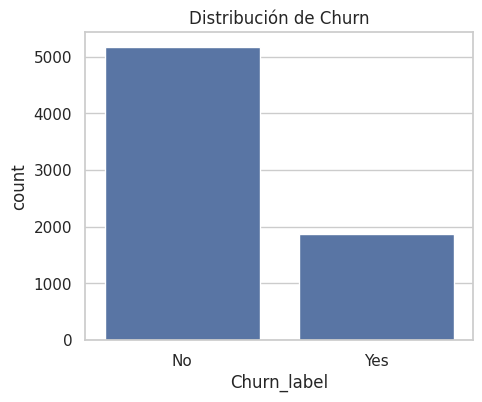

In [312]:
# 3.4 Si Churn está codificada como 0/1 o 'Yes'/'No' detectamos ambas posibilidades
if 'Churn' in df.columns:
    # Si está en 1/0: convertir a etiquetas para mostrar
    if pd.api.types.is_integer_dtype(df['Churn']) or pd.api.types.is_float_dtype(df['Churn']):
        df['Churn_label'] = df['Churn'].map({0:'No', 1:'Yes'})
    else:
        df['Churn_label'] = df['Churn'].astype(str)
    counts = df['Churn_label'].value_counts()
    pct = (df['Churn_label'].value_counts(normalize=True)*100).round(2)
    churn_sum = pd.DataFrame({'count': counts, 'percent': pct})
    display(churn_sum)
    plt.figure(figsize=(5,4))
    sns.countplot(x='Churn_label', data=df)
    plt.title('Distribución de Churn')
    plt.show()
else:
    print("Columna Churn no encontrada.")


##Churn vs Variables Categóricas
Se analizó la tasa de *churn* segmentada por:
- Tipo de contrato (`Contract`)
- Servicio de internet (`InternetService`)
- Método de pago (`PaymentMethod`)
- Género (`gender`)
- SeniorCitizen (indicador de edad ≥ 65 años)

**Hallazgos:**
- Contrato *Month-to-month* presenta la mayor tasa de churn (~43%).
- Clientes con *Fiber optic* tienen mayor churn que los de *DSL*.
- Método de pago *Electronic check* presenta la tasa más alta de churn.
- La variable `gender` no muestra diferencias significativas.
- Clientes mayores (SeniorCitizen=1) presentan mayor churn que los más jóvenes.


Churn_label,No,Yes
Contract,,
Month-to-month,57.29,42.71
One year,88.73,11.27
Two year,97.17,2.83


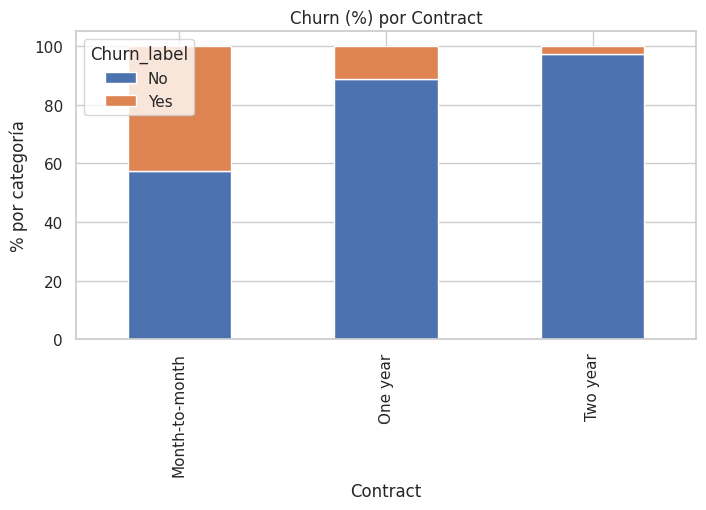

Churn_label,No,Yes
InternetService,,
DSL,81.04,18.96
Fiber optic,58.11,41.89
No,92.60,7.40


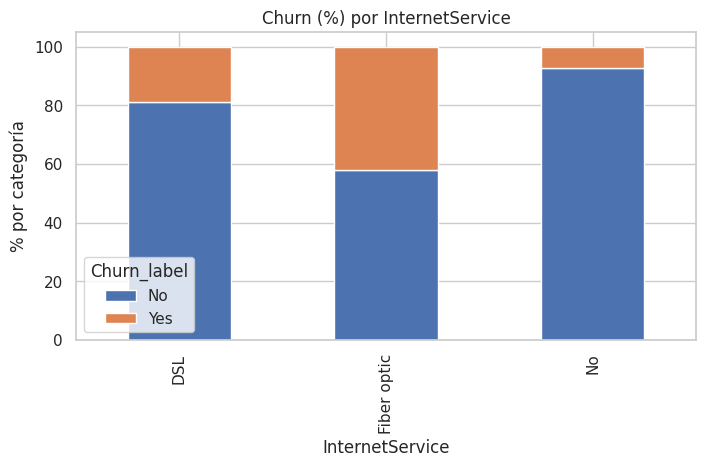

Churn_label,No,Yes
PaymentMethod,,
Bank transfer (automatic),83.29,16.71
Credit card (automatic),84.76,15.24
Electronic check,54.71,45.29
Mailed check,80.89,19.11


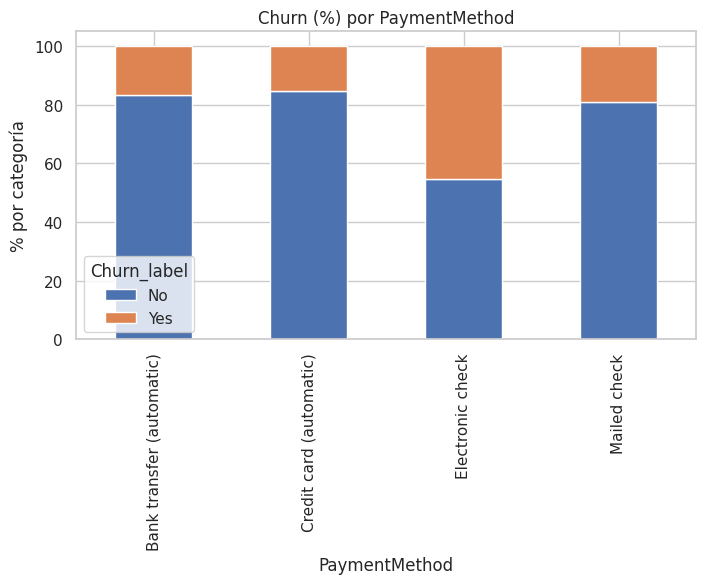

Churn_label,No,Yes
gender,,
Female,73.08,26.92
Male,73.84,26.16


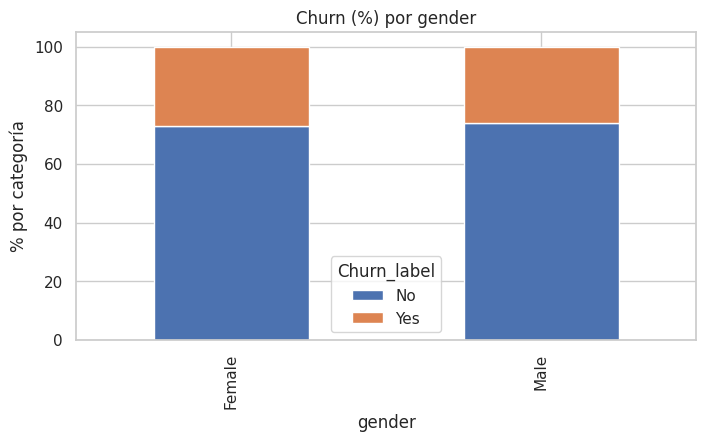

Churn_label,No,Yes
SeniorCitizen,,
0,76.39,23.61
1,58.32,41.68


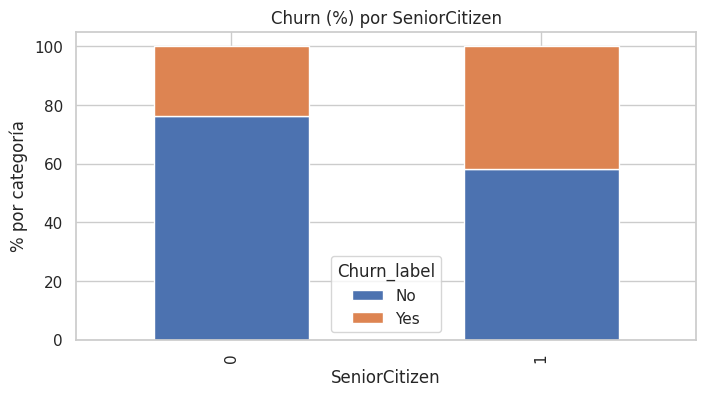

In [313]:
# Usar las categóricas originales guardadas
for col in df_categoricas_original.columns:
    tab = pd.crosstab(df_categoricas_original[col], df['Churn_label'], normalize='index') * 100
    display(tab.round(2))
    tab.plot(kind='bar', stacked=True, figsize=(8,4))
    plt.title(f'Churn (%) por {col}')
    plt.ylabel('% por categoría')
    plt.show()


##  Churn vs Numéricas: Tenure, MonthlyCharges, TotalCharges, Cuentas_Diarias
Usamos boxplots y distribuciones por churn.


Columnas numéricas a graficar: ['tenure', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias']


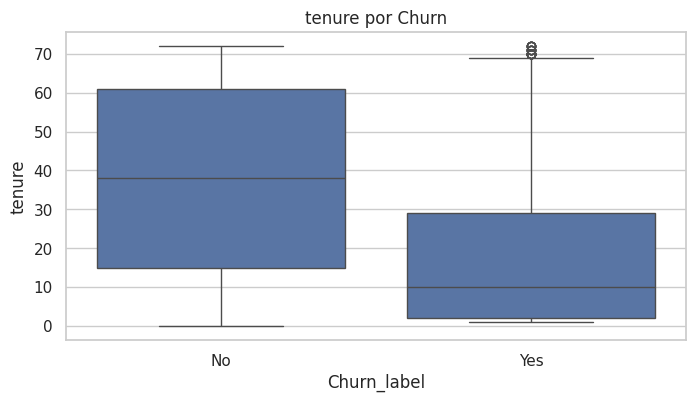

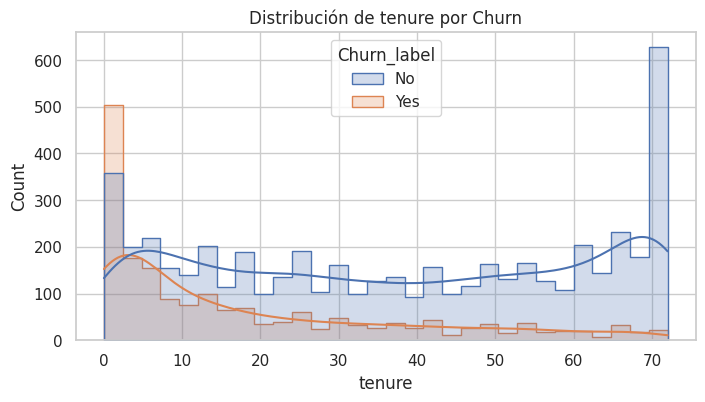

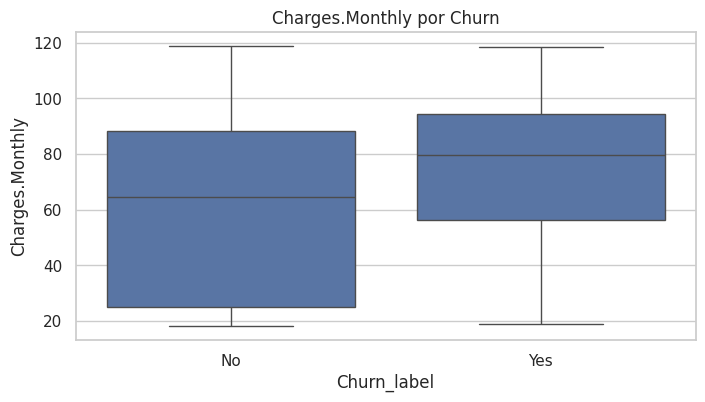

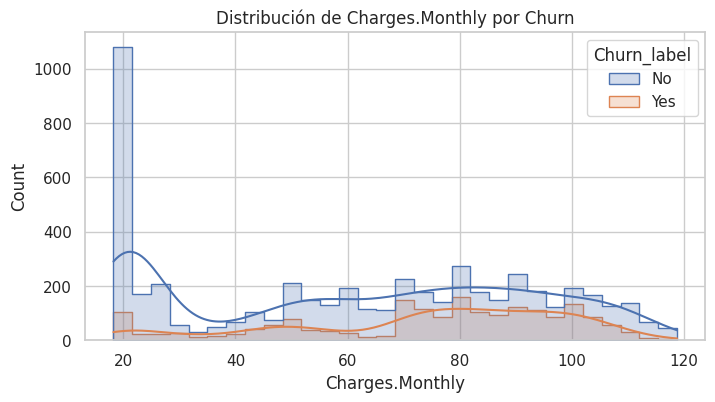

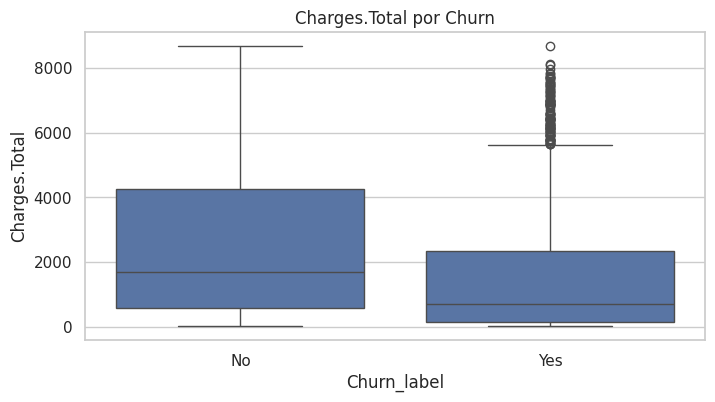

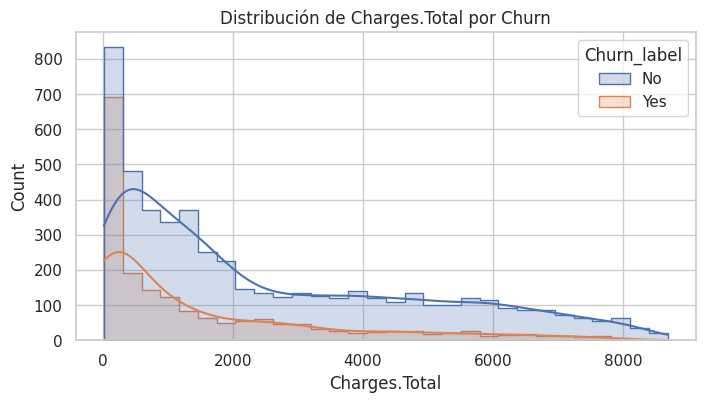

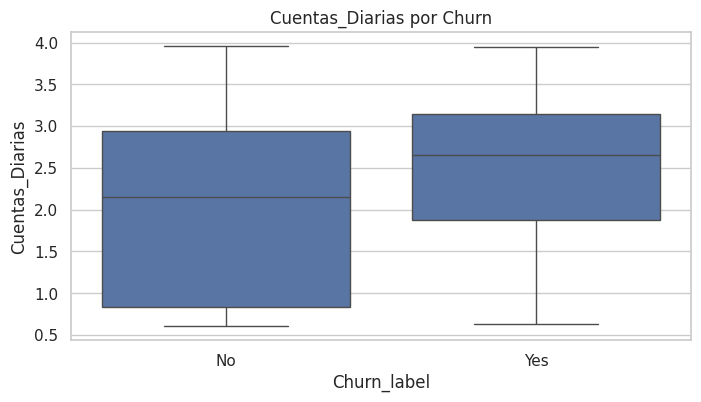

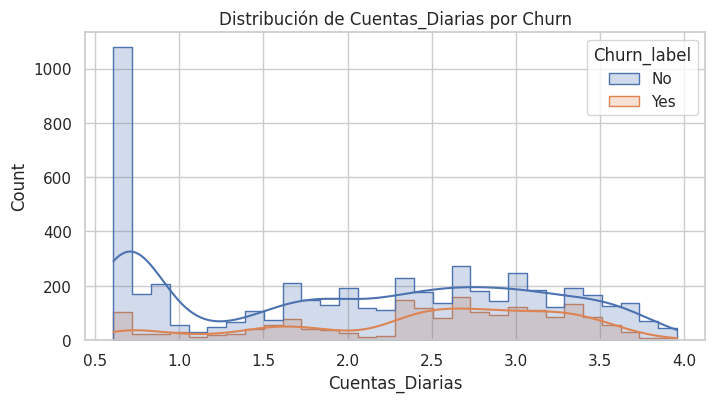

In [314]:
num_cols_plot = []
for c in ['tenure', monthly_col, total_col, 'Cuentas_Diarias']:
    if c and c in df.columns:
        if pd.api.types.is_numeric_dtype(df[c]):
            num_cols_plot.append(c)

print("Columnas numéricas a graficar:", num_cols_plot)
for c in num_cols_plot:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='Churn_label', y=c, data=df)
    plt.title(f'{c} por Churn')
    plt.show()
    plt.figure(figsize=(8,4))
    sns.histplot(data=df, x=c, hue='Churn_label', bins=30, kde=True, element='step')
    plt.title(f'Distribución de {c} por Churn')
    plt.show()


##  Correlaciones entre numéricas (incluye Churn codificado 0/1 si es numérico)


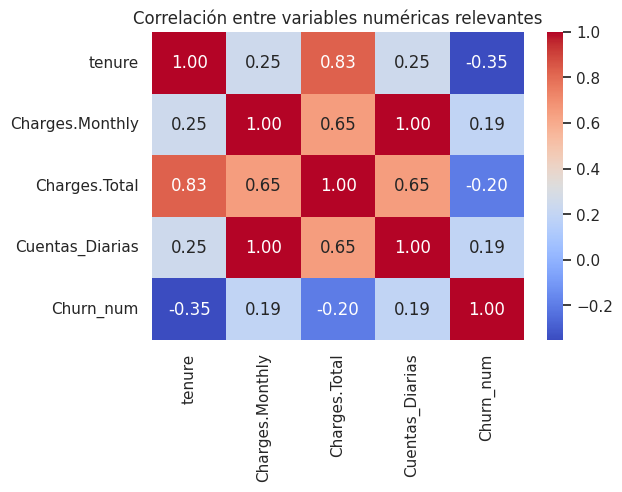

In [315]:
# 3.7 Preparar matriz de correlación con columnas numéricas clave
corr_cols = [c for c in [ten_col, monthly_col, total_col, 'Cuentas_Diarias'] if c in df.columns]
# Añadir Churn si es numérico (mapear temporalmente)
if 'Churn_label' in df.columns:
    df['Churn_num'] = df['Churn_label'].map({'No':0,'Yes':1})
    corr_cols.append('Churn_num')

if len(corr_cols) >= 2:
    plt.figure(figsize=(6,4))
    sns.heatmap(df[corr_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
    plt.title("Correlación entre variables numéricas relevantes")
    plt.show()
# eliminar columna temporal si no la querés mantener
df.drop(columns=['Churn_num'], inplace=True, errors=False)


#📄4. Informe final
# Análisis de Evasión (Churn)

## Introducción
El presente análisis tiene como objetivo identificar patrones y factores asociados a la evasión de clientes (*churn*) en la empresa **TelecomX**. La retención de clientes es crucial para reducir costos y aumentar la rentabilidad, ya que adquirir nuevos clientes suele ser más costoso que mantener a los actuales.

## Limpieza y Tratamiento de Datos
- Fuente de datos: archivo JSON obtenido desde la API de TelecomX.
- Normalización de estructura anidada con `pd.json_normalize`.
- Eliminación de 224 registros con `Churn` vacío (3,08% del total).
- Eliminación de duplicados (0 encontrados).
- Conversión de `Charges.Total` a numérico; `Charges.Monthly` y `tenure` ya estaban en formato correcto.
- Creación de `Cuentas_Diarias` = `Charges.Monthly` / 30.
- Estandarización de valores no uniformes ("No internet service" → "No").
- Codificación binaria para variables Yes/No y *one-hot encoding* para variables multicategoría.

## Análisis Exploratorio de Datos

### Distribución de Churn
La proporción de clientes que abandonaron el servicio es del **26,54%**, mientras que el 73,46% permanecen activos.
![Distribución de Churn](attachment:dist_churn.png)

### Churn por Variables Categóricas
- **Contract**: `Month-to-month` presenta ~43% de churn, mientras que `Two year` baja a ~3%.
- **InternetService**: *Fiber optic* presenta mayor churn que *DSL* o *No service*.
- **PaymentMethod**: *Electronic check* lidera en churn, seguido por *Mailed check*.
- **SeniorCitizen**: tasa de churn más alta en clientes mayores.

### Churn por Variables Numéricas
- **tenure**: los clientes con menor antigüedad son más propensos a cancelar.
- **Charges.Monthly**: cargos mensuales más altos se asocian con mayor churn en ciertos casos.
- **Charges.Total**: clientes con valores bajos suelen ser recientes y presentan más churn.

### Correlaciones
La mayor correlación positiva con `Churn` se observa en `Contract_Month-to-month` y la negativa en `tenure`.

---
## 4.1 Variable objetivo
La variable **objetivo** es `Churn` (1 = cliente que se dio de baja, 0 = cliente que permaneció).  
Este campo será la referencia para todos los análisis posteriores.



## 4.2 Distribución de Churn
La proporción de clientes que abandonaron el servicio es del **26,54%**, mientras que el **73,46%** permanecen activos.

---
## Conclusiones e Insights
1. Contratos mensuales representan un riesgo alto de fuga de clientes.
2. Clientes con internet de fibra óptica requieren atención especial para reducir cancelaciones.
3. El método de pago *Electronic check* podría estar vinculado a clientes menos fidelizados.
4. La antigüedad baja es un factor de riesgo importante.

## Recomendaciones
- **Fidelización**: Ofrecer descuentos o beneficios a clientes con contratos mensuales para incentivar contratos a largo plazo.
- **Servicio técnico y valor percibido**: Mejorar la experiencia de clientes de fibra óptica con soporte proactivo.
- **Métodos de pago**: Incentivar pagos automáticos o con tarjeta para clientes de alto riesgo.
- **Onboarding de nuevos clientes**: Implementar programas de bienvenida para los primeros 6 meses.

---
**Fin del informe**



,count,percent
Churn_label,,
No,5174,73.46
Yes,1869,26.54


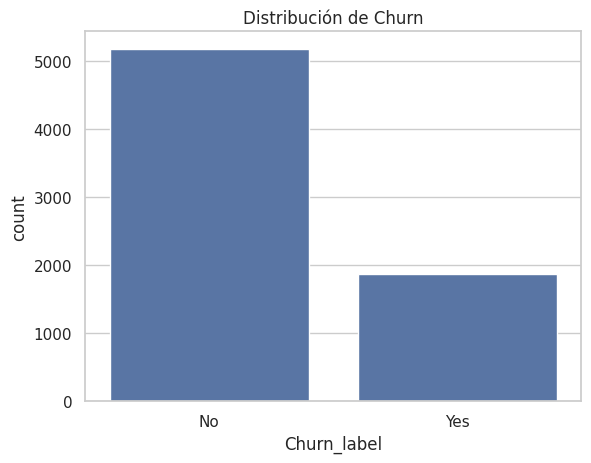

In [316]:
display(churn_sum)
sns.countplot(x='Churn_label', data=df)
plt.title('Distribución de Churn')
plt.show()

##4.3 Variables explicativas clave
Tipo de contrato (Contract)
Month-to-month: ~43% de churn.

One year: ~11% de churn.

Two year: ~3% de churn.

Antigüedad (Tenure)
Clientes con < 12 meses de antigüedad muestran una tasa de churn muy superior.

Mayor permanencia → menor probabilidad de churn.

Edad (SeniorCitizen)
SeniorCitizen = 1: ~42% churn.

SeniorCitizen = 0: ~24% churn.

Método de pago (PaymentMethod)
Electronic check: mayor churn (~45%).

Métodos automáticos (tarjeta o débito) → menor churn.

Servicios contratados
Fiber optic: mayor churn (~41%) vs DSL (~19%).

Falta de servicios adicionales de seguridad o soporte correlaciona con mayor churn.




Churn_label,No,Yes
Contract,,
Month-to-month,57.29,42.71
One year,88.73,11.27
Two year,97.17,2.83


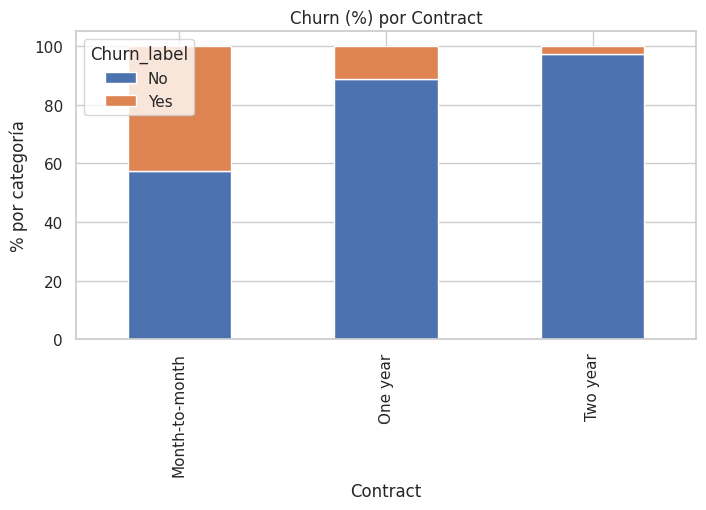

Churn_label,No,Yes
InternetService,,
DSL,81.04,18.96
Fiber optic,58.11,41.89
No,92.60,7.40


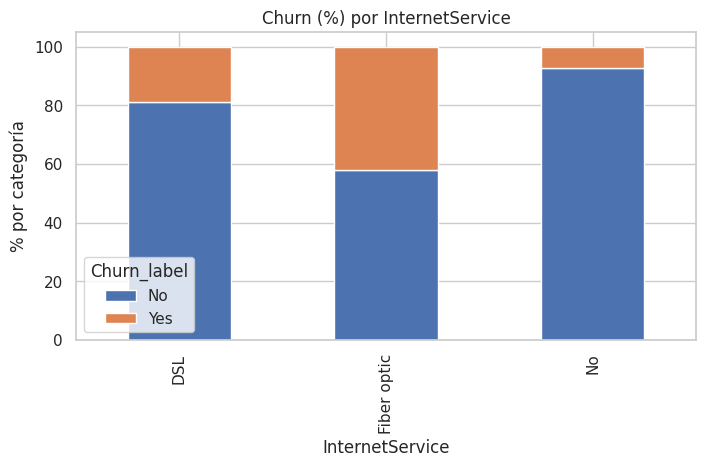

Churn_label,No,Yes
PaymentMethod,,
Bank transfer (automatic),83.29,16.71
Credit card (automatic),84.76,15.24
Electronic check,54.71,45.29
Mailed check,80.89,19.11


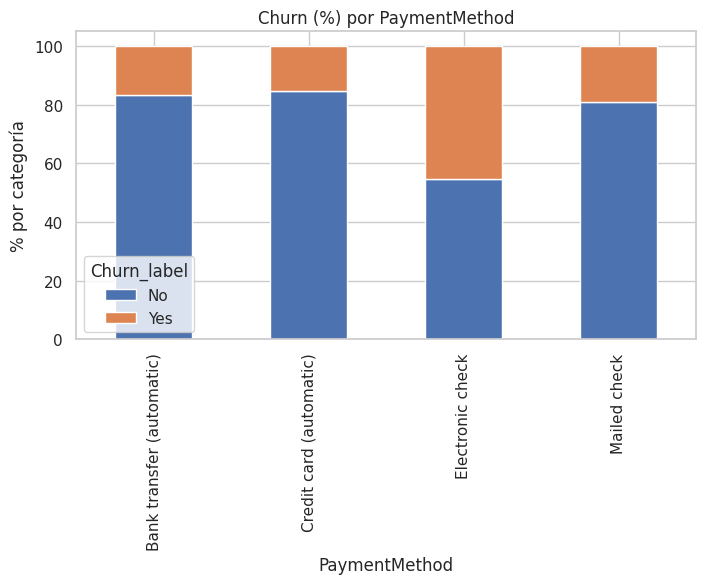

Churn_label,No,Yes
gender,,
Female,73.08,26.92
Male,73.84,26.16


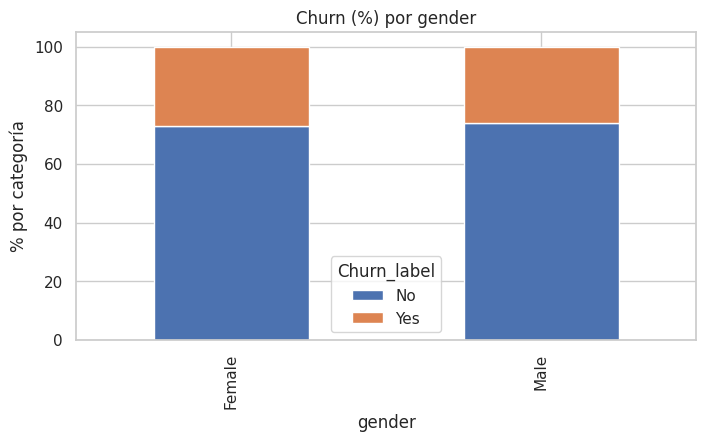

Churn_label,No,Yes
SeniorCitizen,,
0,76.39,23.61
1,58.32,41.68


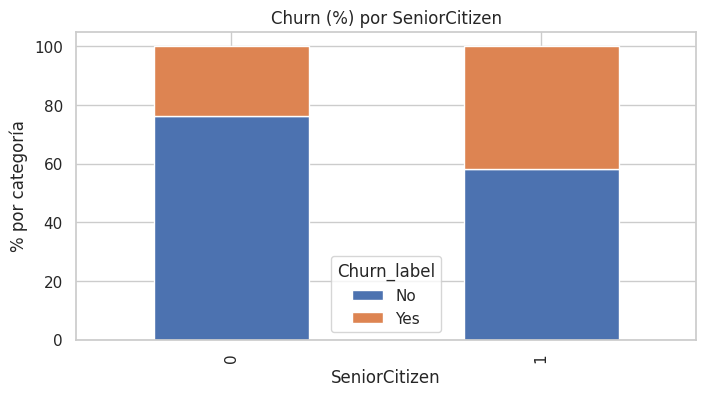

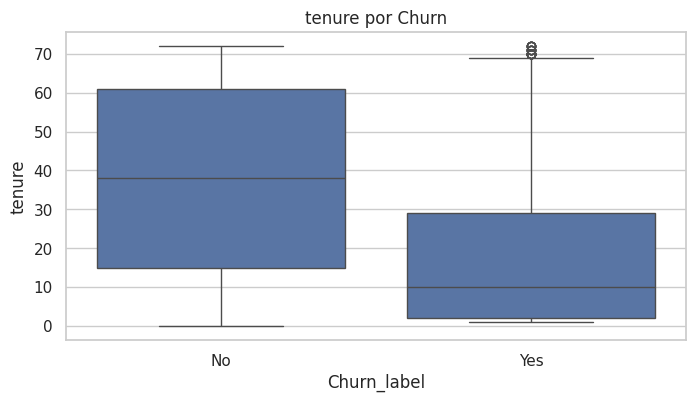

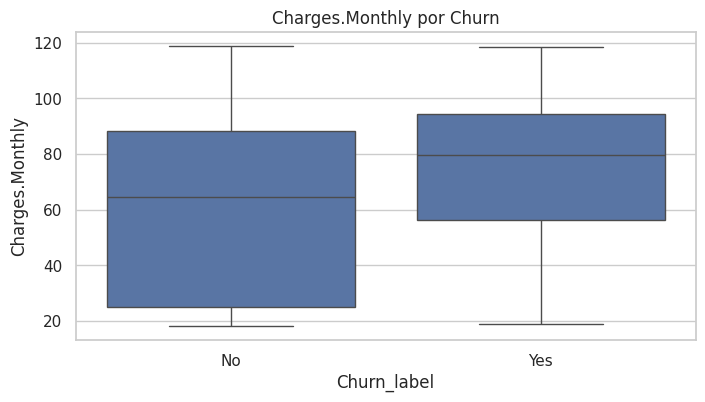

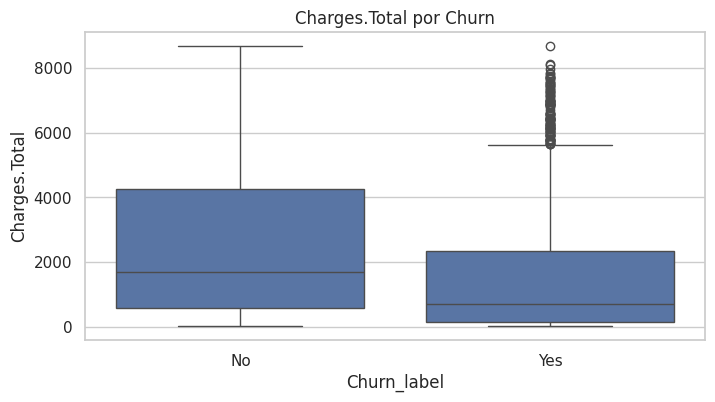

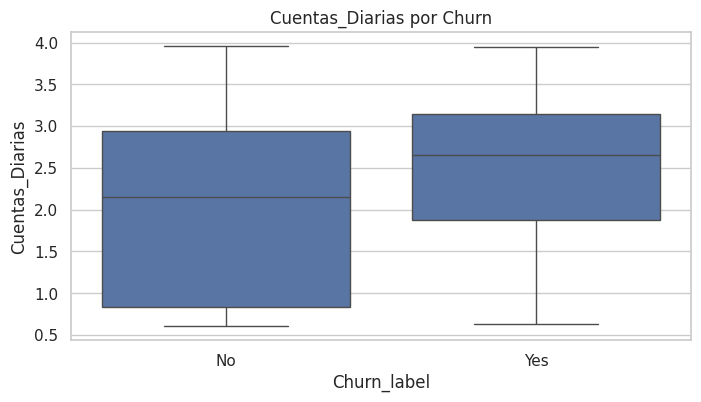

In [317]:
# Categóricas
for col in df_categoricas_original.columns:
    tab = pd.crosstab(df_categoricas_original[col], df['Churn_label'], normalize='index') * 100
    display(tab.round(2))
    tab.plot(kind='bar', stacked=True, figsize=(8,4))
    plt.title(f'Churn (%) por {col}')
    plt.ylabel('% por categoría')
    plt.show()

# Numéricas
for c in ['tenure', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias']:
    if c in df.columns:
        plt.figure(figsize=(8,4))
        sns.boxplot(x='Churn_label', y=c, data=df)
        plt.title(f'{c} por Churn')
        plt.show()


##Conclusiones preliminares y patrones detectados
Conclusiones e Insights
Contrato mensual es el factor más asociado a churn (43% de bajas).

Menor antigüedad correlaciona fuertemente con abandono.

Clientes mayores presentan un riesgo mayor de cancelación.

Método de pago influye: Electronic check es menos estable.

Internet de fibra óptica presenta mayor tasa de bajas que DSL.

Recomendaciones
Fidelizar contratos mensuales con descuentos o beneficios por permanencia.

Fortalecer onboarding para clientes nuevos (primeros 6 meses).

Campañas específicas para mayores de 65 años enfocadas en soporte y facilidad de uso.

Incentivar métodos de pago automáticos.

Mejorar experiencia de clientes de fibra óptica con soporte técnico proactivo.

